In [ ]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_hastie_10_2
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

print(__doc__)

In [17]:
import pickle
with open('saved_variables/X_y_train_test.pickle', 'rb') as open_pickle_file:
    X_train, X_test, y_train, y_test = pickle.load(open_pickle_file)

with open('saved_variables/X_y', 'rb') as open_pickle_file:
    Xq, yq = pickle.load(open_pickle_file)

In [39]:
#X, y = make_hastie_10_2(n_samples=8000, random_state=42)
X, y = Xq, yq

# The scorers can be either be one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``]
param_grid = {'min_samples_split': range(2, 403, 10), ''}

gs = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring=scoring, refit='AUC', return_train_score=True)
gs.fit(X, y)
results = gs.cv_results_
print(results)

{'mean_fit_time': array([0.01098881, 0.00882592, 0.00773845, 0.00498509, 0.00655379,
       0.00591912, 0.00878587, 0.00786757, 0.00541   , 0.00445423,
       0.00607705, 0.00501699, 0.00580835, 0.00395536, 0.00547643,
       0.00477629, 0.00466475, 0.00553675, 0.00389762, 0.00392823,
       0.0034718 , 0.00490823, 0.00601597, 0.00354743, 0.00359621,
       0.00326986, 0.00137076, 0.00185008, 0.00236692, 0.00174489,
       0.00191331, 0.00278306, 0.0024745 , 0.00312243, 0.003093  ,
       0.00244012, 0.00319114, 0.00368767, 0.00324073, 0.00240793,
       0.00212717]), 'std_fit_time': array([0.00305992, 0.00185877, 0.00174521, 0.00062887, 0.00234031,
       0.00079882, 0.00092785, 0.00200585, 0.00128478, 0.00058939,
       0.00218384, 0.0009739 , 0.00060066, 0.00113295, 0.00105003,
       0.00078005, 0.00110933, 0.00076073, 0.00091183, 0.00076822,
       0.00081619, 0.00081119, 0.00117524, 0.00048304, 0.00084021,
       0.00040694, 0.00045809, 0.0003005 , 0.00055274, 0.00043487,
       

In [29]:
list(zip(sorted(scoring), ['g', 'k']))

[('AUC', 'g'), ('Accuracy', 'k')]

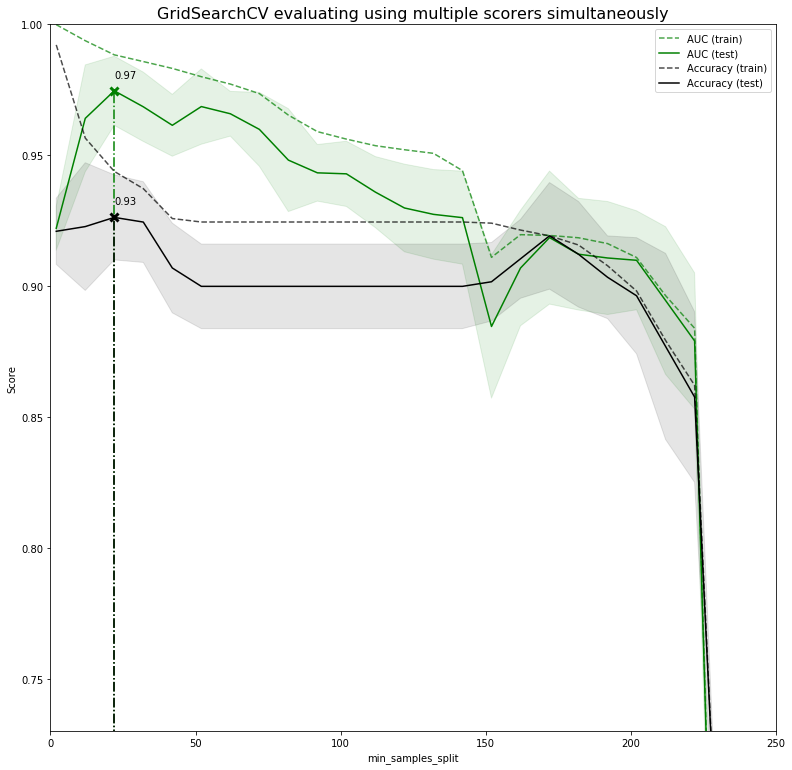

In [42]:
plt.figure(figsize=(13, 13))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",
          fontsize=16)

plt.xlabel("min_samples_split")
plt.ylabel("Score")

ax = plt.gca()
#ax.set_xlim(0, 402)
ax.set_xlim(0,402)
ax.set_ylim(0.73, 1)

# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_min_samples_split'].data, dtype=float)

for scorer, color in zip(sorted(scoring), ['g', 'k']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid(False)
plt.show()